In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rng = np.random.default_rng()

# 0. A Poisson cloud

Let $N$ be the PPP on $\mathbb{R}^2$ with mean intensity
$$
 \mu(dt dx) = e^{-x} dx dt .
$$
Sample from $N$ on the box $[-5, 5] \times [-5, 5]$,
and plot the result.

<img src="https://github.com/mufernando/math607/blob/main/hw/img/hw5_0.jpeg?raw=true" width=400 />

In [3]:
N = rng.poisson(lam=1484)
print(f"We will simulate {N} points")

We will simulate 1517 points


In [4]:
U = rng.uniform(size=N)
V = rng.uniform(size=N)

In [5]:
T = 10 * U - 5
exp10 = np.exp(10)
X = 5 - np.log((1-exp10)*(V+(exp10/(1-exp10))))

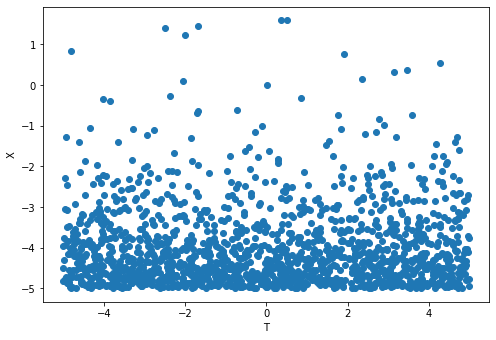

In [6]:
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(T, X)
ax.set_xlabel("T")
ax.set_ylabel("X")
ax.set_aspect(1)

# 1. A wet frog

A frog is sitting in a rainstorm, and drops are falling on its back at random, independent,
Exponential(1)-distributed intervals (i.e., as a PPP(1) in time).
Every time a drop lands, it either hops left (probability 1/2) or right (probability 1/2).
Let $X(t)$ denote the displacement of the frog after time $t$
(in number of hops relative to its starting location, e.g., $X(t) = -3$ is three hops to the left).

a. Use Poisson labeling to find the mean and variance of $X(t)$ (*Hint:* let $X(t) = R(t) - L(t)$,
    where $L$ and $R$ are the number of left and right steps, respectively.)

b. Find the *cumulant generating function* of $X(t)$, defined as $K_t(u) = \log \mathbb{E}[e^{uX(t)}]$.

c. Use this to derive an expression for the $n$th cumulant of $X(t)$, for each $n \ge 1$.
   Note that the first cumulant is the mean and the second is the variance.
   
d. Use simulation to check your result.

<img src="https://github.com/mufernando/math607/blob/main/hw/img/hw5_1.1.jpeg?raw=true" width=400 />
<img src="https://github.com/mufernando/math607/blob/main/hw/img/hw5_1.2.jpeg?raw=true" width=400 />

In [7]:
# number of steps
rate = 1
n = 100
p = 1/2

In [8]:
def sim_frog(n, p=1/2, rate=1):
    map_leftright = np.array([-1,1])
    T = np.concatenate(([0],np.cumsum(rng.exponential(rate, n))))
    # mapping 0s and 1s from binomial to -1 and 1
    steps = map_leftright[rng.binomial(1,p,n)]
    X = np.concatenate(([0],np.cumsum(steps)))
    return (T, X)

In [9]:
T, X = sim_frog(100)

In [10]:
from matplotlib import pyplot as plt

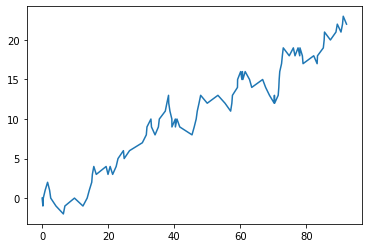

In [11]:
fig, ax = plt.subplots()
ax.plot(T,X)

In [12]:
def Xt(T, X, t):
    last = np.where((T <= t) == True)[0][-1]
    return X[last]

In [13]:
max_t=40

In [14]:
ts = np.linspace(0,max_t, 20)

In [15]:
num_rep = 10000
mat = np.empty(shape=(num_rep,20))
for i in range(num_rep):
    T, X = sim_frog(max_t+5)
    for j, t in enumerate(ts):
        mat[i,j] = Xt(T,X,t)

In [16]:
emp_means = np.mean(mat, axis=0)

In [17]:
emp_vars = np.var(mat, axis=0)

In [18]:
k1 = lambda t: 0
k2 = lambda t: rate * t

In [19]:
print("time\tmean\tobs_mean\tvar\tobs_var")
for i, t in enumerate(ts):
    print(f"{t:.2f}\t{k1(t):.2f}\t{emp_means[i]:.2f}\t{k2(t):.2f}\t{emp_vars[i]:.2f}")

time	mean	obs_mean	var	obs_var
0.00	0.00	0.00	0.00	0.00
2.11	0.00	-0.02	2.11	2.13
4.21	0.00	-0.01	4.21	4.20
6.32	0.00	0.00	6.32	6.21
8.42	0.00	-0.01	8.42	8.29
10.53	0.00	-0.01	10.53	10.47
12.63	0.00	-0.01	12.63	12.74
14.74	0.00	-0.03	14.74	14.86
16.84	0.00	-0.05	16.84	16.89
18.95	0.00	-0.04	18.95	19.01
21.05	0.00	-0.04	21.05	21.14
23.16	0.00	-0.06	23.16	23.22
25.26	0.00	-0.07	25.26	25.23
27.37	0.00	-0.08	27.37	27.43
29.47	0.00	-0.09	29.47	29.74
31.58	0.00	-0.07	31.58	32.01
33.68	0.00	-0.09	33.68	33.76
35.79	0.00	-0.08	35.79	35.52
37.89	0.00	-0.05	37.89	37.36
40.00	0.00	-0.05	40.00	39.16


# 2. Confetti

We plan to drop a great deal of confetti fom a great height onto a large plaza.
Each piece of confetti is a thin paper circle of radius 1cm;
suppose that the confetti will fall more or less uniformly across the plaza
and that confetti may cover each other.

a. Show that if we drop an average of $\lambda$ pieces of confetti per square meter
    that the probability a given point on the plaza is uncovered by confetti
    is $\exp(-\lambda \pi \times 10^{-4})$.

b. What density of confetti (in pieces per square meter)
   do we need to drop so that around 99% of the plaza will be covered by at least one piece of confetti?

c. Check your solutions by simulation.
    To do this, simulate and plot a picture of the confetti process on the unit square (to avoid edge effects,
    simulate uniform confetti on a larger square);
    then estimate the proprotion covered by asking how often
    some set of points is covered across many simulations.

<img src="https://github.com/mufernando/math607/blob/main/hw/img/hw5_2.jpeg?raw=true" width=400 />

### c)

To numerically estimate the proportion of the plaza that is covered by confetti ($p$), we will:

1. Draw how many confettis will be on the plaza from the Poisson (with rate `lambdas`),
2. Draw the coordinates of these confettis from the uniform distribution on the unit square,
3. Check whether each of these points is covered or not by a confetti,
4. Compute $\hat{p}$ as the proportions of points on the grid that are covered by a confetti,
5. For each rate, do steps 2-4 `num_reps` times and average over them.

Finally, we compare our estimates to the theoretical proportions we computed above:

$\mathbb{P}\{N(C) > = 1\} = 1 - e^{-\lambda\pi10^{-2}}$

In [20]:
num_samples = 1000

In [21]:
grid = np.linspace((0,0),(1,1), num_samples)

In [22]:
def is_covered(point, centers, r):
    # returns True if point intersects with any of the circles centered at centers with radius r
    distance = ((point[0] - centers[:,0])**2 + (point[1] - centers[:,1])**2)**0.5
    return np.any(distance < r)

In [23]:
def prop_contained(centers, n):
    return sum([is_covered(point, centers, rad) for point in grid])/ n

In [24]:
rad = 10**-2
lam99 = - (np.log(1/100)*10**4)/ np.pi
lambdas = np.array([1, 10, 100, 1000, lam99])
theo_prop_contained = 1 - np.exp(-lambdas*np.pi*(10**-4))

In [25]:
props = []
num_reps = 100
for lam in lambdas:
    mean_prop = 0
    for _ in range(num_reps):
        Nc = rng.poisson(lam)
        centers = rng.uniform(low=[0,0], high=[1,1], size = (Nc,2))
        mean_prop += prop_contained(centers, num_samples)/num_reps
    props.append(mean_prop)

In [26]:
print("Theoretical and observed proportion of the unit square that is covered by confetti")
print("lambda\tTheoretical\tObserved")
for i, lam in enumerate(lambdas):
    print(f"{lam:.3f}\t{theo_prop_contained[i]:.3f}\t{props[i]:.3f}")

Theoretical and observed proportion of the unit square that is covered by confetti
lambda	Theoretical	Observed
1.000	0.000	0.000
10.000	0.003	0.003
100.000	0.031	0.031
1000.000	0.270	0.276
14658.712	0.990	0.988
